Name: Shreyansh Tiwari

Logistic Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder

In [5]:
data=pd.read_csv("heart.csv")
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
le=LabelEncoder()
data.ChestPainType = le.fit_transform(data.ChestPainType)
data.RestingECG = le.fit_transform(data.RestingECG)
data.ExerciseAngina = le.fit_transform(data.ExerciseAngina)
data.ST_Slope = le.fit_transform(data.ST_Slope)
data.Sex = le.fit_transform(data.Sex)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=data.drop("HeartDisease",axis=1)
y=data["HeartDisease"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.13026512503639598

knn classification

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracy_rate=[]

for i in range(1,40):
    classifier= KNeighborsClassifier(n_neighbors =i)
    score = cross_val_score(classifier,x,y,cv=10)
    accuracy_rate.append(score.mean())

In [15]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

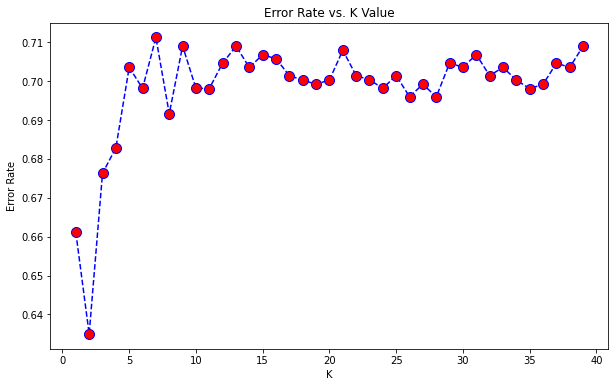

In [16]:





plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Decision Tree Classifier

In [17]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [18]:
inputs_n = data.drop(['Age','RestingBP','Cholesterol','FastingBS','MaxHR','HeartDisease','ExerciseAngina','Oldpeak','ST_Slope'],axis='columns')
target=data['HeartDisease']

In [19]:
inputs_n

,Sex,ChestPainType,RestingECG
0,1,1,1
1,0,2,1
2,1,1,2
3,0,0,1
4,1,2,1
...,...,...,...
913,1,3,1
914,1,0,1
915,1,0,1
916,0,1,0


In [20]:
target

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [22]:
model.score(inputs_n,target)

0.7788671023965141

In [23]:
model.predict([[1,1,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

Forest classification

In [29]:
X=inputs_n
y=target

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [32]:
model.score(X_test, y_test)

0.782608695652174

In [33]:
y_predicted = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[70, 27],
       [13, 74]])

Text(69.0, 0.5, 'Truth')

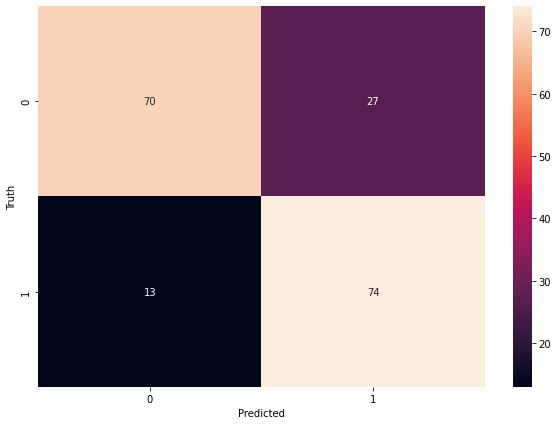

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
